## 1. Requeriments

In [333]:
# import os
# import torch
# os.environ['TORCH'] = torch.__version__
# print(torch.__version__)

# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# # !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-1.12.1+cpu.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
# !pip install -q captum

## 2. Import libraries

In [334]:
import torch
from torch_geometric.data import Data
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import random

## 3. Graph building

### 3.1. Gene matrix

In [335]:
genes = pd.read_csv('../Data/mRCC genes (disgenet)/mrcc_protein_matrix.csv')
Y = genes.Y

genes = genes.iloc[:,1:102] 
genes

,ACKR3,ACTN4,AHR,AKT1,ALB,ANGPT2,ANXA2,APLN,APLNR,AR,...,TGFA,TGFBI,TICAM2,TIMP1,TMED7-TICAM2,VCAM1,VDR,VEGFA,VHL,WWOX
0,31.648409,36.959376,33.703947,34.434275,31.188969,31.811998,37.396638,31.631928,29.213710,31.958028,...,32.63708,36.37213,27.27919,36.87599,29.28179,35.69036,30.00450,37.79678,32.30615,33.19217
1,33.082148,37.518350,33.396665,34.152701,31.415961,33.320691,36.570671,34.118576,30.766414,32.397556,...,31.50477,38.39603,22.41477,36.04233,31.39303,36.56088,31.02120,40.09193,32.19988,34.09405
2,32.342285,36.873023,33.242494,35.449119,26.146141,31.265365,38.443020,34.272847,29.243837,31.120869,...,29.29853,34.24952,26.21874,34.92449,31.75233,35.28440,31.79667,38.22308,31.49147,33.91476
3,33.791059,37.890871,34.131470,34.220278,31.661323,33.274708,37.244829,34.825371,30.380514,29.255782,...,29.62080,37.76864,27.19268,36.51244,31.85490,33.99246,29.70039,39.94908,32.11538,33.56484
4,32.547083,37.205900,34.934910,33.973368,23.486534,33.456080,36.871693,35.641010,30.434849,28.876694,...,22.40661,37.12050,22.41477,36.86574,23.71048,33.43134,30.09807,39.31564,33.33646,34.11384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,33.635882,37.594156,33.741687,35.057571,28.126262,32.469349,37.436964,36.496173,32.016398,29.211709,...,31.18734,39.44798,23.99949,36.28807,28.03430,32.59761,30.18159,40.48054,31.79913,34.02174
177,32.390735,35.376233,35.583590,32.553513,29.888454,30.530621,37.635004,31.128900,27.225418,31.310019,...,29.25294,37.09158,27.71255,35.43488,28.03430,35.99542,27.86996,37.41392,31.66344,33.66248
178,34.487248,37.319844,34.810372,34.807825,35.427622,32.870260,37.953757,35.430557,30.866568,29.616077,...,31.73532,40.37561,27.52222,37.31944,32.52619,33.37020,30.79683,38.72091,32.39461,34.17006
179,35.430115,37.585553,34.602117,34.787403,28.802559,33.139063,35.957212,33.642514,29.484997,32.887222,...,31.29793,34.31276,22.09014,35.60682,32.62210,34.72990,31.35321,40.53108,32.34561,33.63385


### 3.2. Graph edges

In [336]:
path ='../Data/Programmed cell death protein/network_edges_pd-1.tsv'
data = pd.read_csv(path, delimiter='\t')
edge_index1=data['#node1'].to_numpy()
edge_index2=data['node2'].to_numpy()

In [337]:
le = preprocessing.LabelEncoder()
le.fit(edge_index1)
len(list(le.classes_))

38

In [338]:
edge_index1 = le.transform(edge_index1)
edge_index2 = le.transform(edge_index2)

In [339]:
edge_index = [edge_index1]+[edge_index2]
edge_index = np.array(edge_index)

In [340]:
edge_index

array([[ 0,  0,  5,  5,  1,  1,  2,  3,  4,  4,  4,  4,  6,  7,  7,  8,
         8,  8,  8,  9,  9,  9,  9, 10, 11, 11, 11, 12, 12, 13, 13, 13,
        14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17,
        17, 18, 18, 19, 20, 21, 22, 22, 22, 22, 22, 22, 23, 23, 24, 24,
        25, 25, 25, 25, 26, 26, 27, 27, 27, 28, 29, 30, 30, 31, 31, 32,
        32, 32, 33, 34, 34, 35, 35, 35, 36, 37],
       [22, 19,  4, 17, 24, 22,  3,  2, 18,  6, 17,  5,  4, 31, 30, 29,
        11, 17,  9, 11, 10, 12,  8,  9, 12,  8,  9, 11,  9, 16, 14, 15,
        22, 13, 15, 16, 22, 13, 14, 16, 22, 13, 14, 15,  4,  8, 27,  5,
        18,  4, 17,  0, 21, 20,  1, 24, 15, 14,  0, 16, 25, 27,  1, 22,
        33, 23, 34, 32, 34, 32, 28, 17, 23, 27,  8, 31,  7,  7, 30, 25,
        35, 26, 25, 25, 26, 32, 37, 36, 35, 35]])

In [341]:
edge_index = torch.tensor(edge_index, dtype=torch.int64)
edge_index

tensor([[ 0,  0,  5,  5,  1,  1,  2,  3,  4,  4,  4,  4,  6,  7,  7,  8,  8,  8,
          8,  9,  9,  9,  9, 10, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 14,
         15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 19, 20, 21,
         22, 22, 22, 22, 22, 22, 23, 23, 24, 24, 25, 25, 25, 25, 26, 26, 27, 27,
         27, 28, 29, 30, 30, 31, 31, 32, 32, 32, 33, 34, 34, 35, 35, 35, 36, 37],
        [22, 19,  4, 17, 24, 22,  3,  2, 18,  6, 17,  5,  4, 31, 30, 29, 11, 17,
          9, 11, 10, 12,  8,  9, 12,  8,  9, 11,  9, 16, 14, 15, 22, 13, 15, 16,
         22, 13, 14, 16, 22, 13, 14, 15,  4,  8, 27,  5, 18,  4, 17,  0, 21, 20,
          1, 24, 15, 14,  0, 16, 25, 27,  1, 22, 33, 23, 34, 32, 34, 32, 28, 17,
         23, 27,  8, 31,  7,  7, 30, 25, 35, 26, 25, 25, 26, 32, 37, 36, 35, 35]])

### 3.3. Create dataset

In [342]:
list_data_0=[]
list_data_1=[]

for g in range(len(genes)):
  b=[]
  for i in genes.iloc[g].to_numpy():
    a=[]
    a.append(i*10)
    b.append(a)
  x = torch.tensor([b], dtype=torch.float).reshape([-1])
  edge_index = edge_index
  y = torch.tensor([Y.iloc[g]], dtype=torch.float).reshape([-1, 1])
  data = Data(x=x, edge_index=edge_index, y=y)
  if y == 0:
    list_data_0.append(data)
  else:
    list_data_1.append(data)

print(list_data_0[0])

Data(x=[101], edge_index=[2, 90], y=[1, 1])


In [343]:
len(list_data_1)

96

### 3.4. Patient sample

In [344]:
data = list_data_0[0]
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of charcateristics per node: {data.num_features}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Number of nodes: 101
Number of charcateristics per node: 1
Number of edges: 90
Average node degree: 0.89
Has isolated nodes: True
Has self-loops: False
Is undirected: True


## 4. Graph training

### 4.1. Train-Test splitting

In [345]:
# torch.manual_seed(1255)
random.shuffle(list_data_0)
random.shuffle(list_data_1)

train_dataset = list_data_0[0:72]
test_dataset = list_data_0[72:86]
train_dataset = train_dataset + list_data_1[0:81]
test_dataset = test_dataset + list_data_1[81:97]
random.shuffle(train_dataset)
random.shuffle(test_dataset)
print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')
cont = 0
cont1=0
for i in train_dataset:
    if i.y == 0:
        cont+=1
for i in test_dataset:
    if i.y == 0:
        cont1+=1
print("Negative cases from train: " + str(cont) + " of " + str(len(train_dataset)) + " = " + str(cont/len(train_dataset)))
print("Negative cases from test: " + str(cont1) + " of " + str(len(test_dataset)) + " = " + str(cont1/len(test_dataset)))
print("It should be 46.9")

Number of training graphs: 153
Number of test graphs: 28
Negative cases from train: 72 of 153 = 0.47058823529411764
Negative cases from test: 13 of 28 = 0.4642857142857143
It should be 46.9


In [346]:
# torch.manual_seed(0)
# random.shuffle(list_data)
# train_dataset = list_data[0:124]
# test_dataset = list_data[124:182]
# print(f'Number of training graphs: {len(train_dataset)}')
# print(f'Number of test graphs: {len(test_dataset)}')
# cont = 0
# cont1=0
# for i in train_dataset:
#     if i.y == 0:
#         cont+=1
# for i in test_dataset:
#     if i.y == 0:
#         cont1+=1
# print("Negative cases from train: " + str(cont) + " of " + str(len(train_dataset)) + " = " + str(cont/len(train_dataset)))
# print("Negative cases from test: " + str(cont1) + " of " + str(len(test_dataset)) + " = " + str(cont1/len(test_dataset)))
# print("It should be 46.9")

In [347]:
from torch_geometric.loader import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

Step 1:
Number of graphs in the current batch: 32
DataBatch(x=[3232], edge_index=[2, 2880], y=[32, 1], batch=[3232], ptr=[33])

Step 2:
Number of graphs in the current batch: 32
DataBatch(x=[3232], edge_index=[2, 2880], y=[32, 1], batch=[3232], ptr=[33])

Step 3:
Number of graphs in the current batch: 32
DataBatch(x=[3232], edge_index=[2, 2880], y=[32, 1], batch=[3232], ptr=[33])

Step 4:
Number of graphs in the current batch: 32
DataBatch(x=[3232], edge_index=[2, 2880], y=[32, 1], batch=[3232], ptr=[33])

Step 5:
Number of graphs in the current batch: 25
DataBatch(x=[2525], edge_index=[2, 2250], y=[25, 1], batch=[2525], ptr=[26])



### 4.2. Training and testing the model

In [348]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GraphConv
from torch_geometric.nn import TopKPooling, knn_graph, SAGPooling
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
from torch import nn


In [349]:
embed_dim = 101

class Net(torch.nn.Module):
    def __init__(self, dim):
        super(Net, self).__init__()
        self.dim = dim
        super(Net, self).__init__()
        self.conv1 = GraphConv(embed_dim, dim)
        self.pool1 = SAGPooling(dim, ratio=0.2)
        self.conv2 = GraphConv(dim, dim)
        self.pool2 = SAGPooling(dim, ratio=0.2)
        self.item_embedding = torch.nn.Embedding(num_embeddings=419, embedding_dim=embed_dim)
        self.lin1 = torch.nn.Linear(6464, 1000)
        self.lin2 = torch.nn.Linear(1000, 300)
        self.lin3 = torch.nn.Linear(300, 1)
        self.act1 = torch.nn.ReLU()
        print(self)

    def forward(self, x, edge_index, batch):
        x = torch.tensor(x).to(torch.int)
        x = self.item_embedding(x)
        x = x.squeeze(1)

        x = F.relu(self.conv1(x, edge_index))
        x, edge_index, _, batch, _, _ = self.pool1(x, edge_index, None, batch)
        x1 = torch.cat([gmp(x, batch), gap(x, batch)], dim=1)

        x = F.relu(self.conv2(x, edge_index))
        x, edge_index, _, batch, _, _ = self.pool2(x, edge_index, None, batch)
        x2 = torch.cat([gmp(x, batch), gap(x, batch)], dim=1)

        x = x1 + x2

        x = self.lin1(x)
        x = self.act1(x)
        x = self.lin2(x)
        x = self.act1(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = torch.sigmoid(self.lin3(x)).squeeze(1)
        return x


In [350]:
def train(epoch):
    model.train()
    criterion = nn.BCELoss()
    loss_all = 0
    for data in train_loader:
        output = model(data.x, data.edge_index, data.batch)
        loss = criterion(output, data.y.squeeze(1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_all += loss.item() * data.num_graphs

    return loss_all / len(train_dataset)


def test(loader):
    model.eval()

    correct = 0
    for data in loader:
        data = data
        output = model(data.x, data.edge_index, data.batch)
        for i in range(len(output)):
            if output[i]>0.5:
                output[i]=1
            else:
                output[i]=0
            if output[i]==data.y[i]:
                correct=correct+1
    # print("Correct: "+str(correct) +" of "+str(len(loader.dataset)))
    return correct / len(loader.dataset)

Net(
  (conv1): GraphConv(101, 3232)
  (pool1): SAGPooling(GraphConv, 3232, ratio=0.2, multiplier=1.0)
  (conv2): GraphConv(3232, 3232)
  (pool2): SAGPooling(GraphConv, 3232, ratio=0.2, multiplier=1.0)
  (item_embedding): Embedding(419, 101)
  (lin1): Linear(in_features=6464, out_features=1000, bias=True)
  (lin2): Linear(in_features=1000, out_features=300, bias=True)
  (lin3): Linear(in_features=300, out_features=1, bias=True)
  (act1): ReLU()
)


C:\Users\sandr\AppData\Local\Temp/ipykernel_17256/888714444.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x).to(torch.int)


Epoch: 001, Loss: 0.8046, Train Acc: 0.4837, Test Acc: 0.5357
Epoch: 002, Loss: 0.8645, Train Acc: 0.4641, Test Acc: 0.5714
Epoch: 003, Loss: 0.8072, Train Acc: 0.5229, Test Acc: 0.4643
Epoch: 004, Loss: 0.7333, Train Acc: 0.5163, Test Acc: 0.3214
Epoch: 005, Loss: 0.7049, Train Acc: 0.5490, Test Acc: 0.4286
Epoch: 006, Loss: 0.6987, Train Acc: 0.5752, Test Acc: 0.5357
Epoch: 007, Loss: 0.6961, Train Acc: 0.5621, Test Acc: 0.4643
Epoch: 008, Loss: 0.7033, Train Acc: 0.5556, Test Acc: 0.4286
Epoch: 009, Loss: 0.6863, Train Acc: 0.5817, Test Acc: 0.4643
Epoch: 010, Loss: 0.6794, Train Acc: 0.5556, Test Acc: 0.4643
Epoch: 011, Loss: 0.7022, Train Acc: 0.6078, Test Acc: 0.6071
Epoch: 012, Loss: 0.6897, Train Acc: 0.5948, Test Acc: 0.5714
Epoch: 013, Loss: 0.6812, Train Acc: 0.6471, Test Acc: 0.6071
Epoch: 014, Loss: 0.6683, Train Acc: 0.6013, Test Acc: 0.5714
Epoch: 015, Loss: 0.6492, Train Acc: 0.6536, Test Acc: 0.6429
Epoch: 016, Loss: 0.6364, Train Acc: 0.6405, Test Acc: 0.6071
Epoch: 0

No handles with labels found to put in legend.


Epoch: 049, Loss: 0.5059, Train Acc: 0.7647, Test Acc: 0.5357
Net(
  (conv1): GraphConv(101, 3232)
  (pool1): SAGPooling(GraphConv, 3232, ratio=0.2, multiplier=1.0)
  (conv2): GraphConv(3232, 3232)
  (pool2): SAGPooling(GraphConv, 3232, ratio=0.2, multiplier=1.0)
  (item_embedding): Embedding(419, 101)
  (lin1): Linear(in_features=6464, out_features=1000, bias=True)
  (lin2): Linear(in_features=1000, out_features=300, bias=True)
  (lin3): Linear(in_features=300, out_features=1, bias=True)
  (act1): ReLU()
)
Epoch: 001, Loss: 39.3588, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 002, Loss: 47.0588, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 003, Loss: 47.0588, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 004, Loss: 47.0588, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 005, Loss: 47.0588, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 006, Loss: 47.0588, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 007, Loss: 47.0588, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 008, Loss: 47.0588, Train Acc: 0.5294, 

No handles with labels found to put in legend.


Epoch: 049, Loss: 47.0588, Train Acc: 0.5294, Test Acc: 0.5357
Net(
  (conv1): GraphConv(101, 3232)
  (pool1): SAGPooling(GraphConv, 3232, ratio=0.2, multiplier=1.0)
  (conv2): GraphConv(3232, 3232)
  (pool2): SAGPooling(GraphConv, 3232, ratio=0.2, multiplier=1.0)
  (item_embedding): Embedding(419, 101)
  (lin1): Linear(in_features=6464, out_features=1000, bias=True)
  (lin2): Linear(in_features=1000, out_features=300, bias=True)
  (lin3): Linear(in_features=300, out_features=1, bias=True)
  (act1): ReLU()
)
Epoch: 001, Loss: 0.8013, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 002, Loss: 1.4614, Train Acc: 0.5163, Test Acc: 0.5714
Epoch: 003, Loss: 1.0037, Train Acc: 0.5163, Test Acc: 0.6429
Epoch: 004, Loss: 0.8478, Train Acc: 0.5163, Test Acc: 0.3929
Epoch: 005, Loss: 0.7328, Train Acc: 0.5882, Test Acc: 0.3571
Epoch: 006, Loss: 0.7182, Train Acc: 0.5817, Test Acc: 0.4286
Epoch: 007, Loss: 0.6717, Train Acc: 0.6405, Test Acc: 0.5000
Epoch: 008, Loss: 0.6877, Train Acc: 0.5817, Test Ac

No handles with labels found to put in legend.


Epoch: 034, Loss: 0.3350, Train Acc: 0.9150, Test Acc: 0.5357
Net(
  (conv1): GraphConv(101, 3232)
  (pool1): SAGPooling(GraphConv, 3232, ratio=0.2, multiplier=1.0)
  (conv2): GraphConv(3232, 3232)
  (pool2): SAGPooling(GraphConv, 3232, ratio=0.2, multiplier=1.0)
  (item_embedding): Embedding(419, 101)
  (lin1): Linear(in_features=6464, out_features=1000, bias=True)
  (lin2): Linear(in_features=1000, out_features=300, bias=True)
  (lin3): Linear(in_features=300, out_features=1, bias=True)
  (act1): ReLU()
)
Epoch: 001, Loss: 1.5292, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 002, Loss: 0.7825, Train Acc: 0.4510, Test Acc: 0.4643
Epoch: 003, Loss: 0.7381, Train Acc: 0.5490, Test Acc: 0.4643
Epoch: 004, Loss: 0.7323, Train Acc: 0.5948, Test Acc: 0.5000
Epoch: 005, Loss: 0.7158, Train Acc: 0.5621, Test Acc: 0.5714
Epoch: 006, Loss: 0.7053, Train Acc: 0.5882, Test Acc: 0.4643
Epoch: 007, Loss: 0.6778, Train Acc: 0.6536, Test Acc: 0.3571
Epoch: 008, Loss: 0.7065, Train Acc: 0.5294, Test Acc

No handles with labels found to put in legend.


Epoch: 040, Loss: 0.2177, Train Acc: 0.9085, Test Acc: 0.5714
Net(
  (conv1): GraphConv(101, 3232)
  (pool1): SAGPooling(GraphConv, 3232, ratio=0.2, multiplier=1.0)
  (conv2): GraphConv(3232, 3232)
  (pool2): SAGPooling(GraphConv, 3232, ratio=0.2, multiplier=1.0)
  (item_embedding): Embedding(419, 101)
  (lin1): Linear(in_features=6464, out_features=1000, bias=True)
  (lin2): Linear(in_features=1000, out_features=300, bias=True)
  (lin3): Linear(in_features=300, out_features=1, bias=True)
  (act1): ReLU()
)
Epoch: 001, Loss: 1.7340, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 002, Loss: 1.6431, Train Acc: 0.4902, Test Acc: 0.5357
Epoch: 003, Loss: 0.7958, Train Acc: 0.5752, Test Acc: 0.5357
Epoch: 004, Loss: 0.7272, Train Acc: 0.5686, Test Acc: 0.5714
Epoch: 005, Loss: 0.6935, Train Acc: 0.5948, Test Acc: 0.6429
Epoch: 006, Loss: 0.6724, Train Acc: 0.6209, Test Acc: 0.7143
Epoch: 007, Loss: 0.6880, Train Acc: 0.5621, Test Acc: 0.5714
Epoch: 008, Loss: 0.6725, Train Acc: 0.5556, Test Acc

No handles with labels found to put in legend.


Epoch: 037, Loss: 0.3710, Train Acc: 0.9020, Test Acc: 0.3929
Test accuracy: 0.5142857142857143
Test stv: 0.0622699849077239


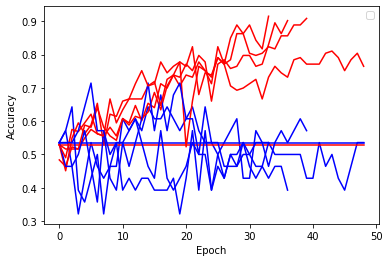

In [351]:
import matplotlib.pyplot as plt
test_avg = []
for i in range(5):
    model = Net(dim=3232)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    train_epoch=[]
    test_epoch=[]
    epoch = 1
    train_acc=0
    while train_acc < 0.9 and epoch < 50:
        loss = train(epoch)
        train_acc = test(train_loader)
        test_acc = test(test_loader)
        train_epoch.append(train_acc)
        test_epoch.append(test_acc)
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, '
            f'Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
        epoch +=1

    plt.plot(train_epoch, color="red")
    plt.plot(test_epoch, color="blue")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    test_avg.append(test_acc)

print('Test accuracy: '+ str(np.array(test_avg).mean()))
print('Test stv: '+ str(np.array(test_avg).std()))